В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:


### 1 Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


In [22]:
from collections import Counter, defaultdict
import re
import random
from copy import copy

from collections import Counter
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk import everygrams
from tqdm import tqdm

import matplotlib.pyplot as plt

In [16]:
TOKENS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
TOKENS_LIST = list(TOKENS)

In [5]:
data_anna_kerenina = './data/AnnaKarenina.txt'

In [10]:
with open(data_anna_kerenina ,'r') as f:
#     anna_kerenina_txt = f.readlines()
      anna_kerenina_counter = Counter(f.read().lower())  

In [97]:
def count_letters(counter):
    number = 0
    for i in range(len(TOKENS_LIST)):
        number += counter[TOKENS_LIST[i]]
    return number

def frequency(number, counter):
    arr_frequency = []
    for i in range(len(TOKENS_LIST)):
        ratio = counter[TOKENS_LIST[i]] / number * 100
        arr_frequency.append(ratio)
    return arr_frequency


def plotting_diagram(frequency,label):
    fig, ax = plt.subplots()

    xs = range(len(TOKENS_LIST))

    ax.bar([x + 0.15 for x in xs], frequency,
           width=0.1, color='blue', alpha=0.7, label=label,
           zorder=2)

    plt.xticks(xs, TOKENS_LIST)
    ax.set_facecolor('seashell')
    fig.set_figwidth(15)
    fig.set_figheight(10)
    fig.set_facecolor('floralwhite')
    plt.legend()
    
def accuracy(text, decoded_text):
    assert len(text) == len(decoded_text)
    true_token = 0
    for t1, t2 in zip(text, decoded_text):
        true_token += int(t1 == t2)
    return true_token / len(text)

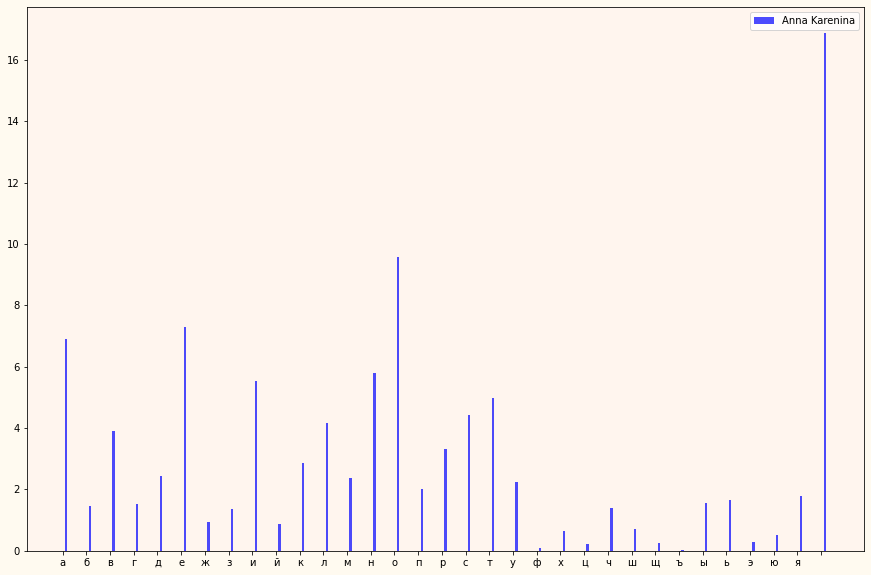

In [27]:
count_anna_kerenina = count_letters(anna_kerenina_counter)
lst_frequency = frequency(count_anna_kerenina,anna_kerenina_counter)
plotting_diagram(lst_frequency,'Anna Karenina')

In [31]:
count_anna_kerenina

1698012

In [41]:
def cipher(text):
    original_tokens = TOKENS_LIST
    encoded_tokens = np.random.choice(original_tokens, replace=False, size=len(original_tokens))
    encoder = dict()
    
    for  original_token,  encoded_token in zip(original_tokens, encoded_tokens):
        encoder[original_token] = encoded_token
        
    encoded_text = ''.join([encoder[token] if token in encoder else token for token in text])
    return encoded_text           

In [112]:
text  = 'Степан Аркадьич не избирал ни направления, ни взглядов, а эти направления и взгляды сами приходили к нему, точно так же, как он не выбирал формы шляпы или сюртука, а брал те, которые носят. А иметь взгляды ему, жившему в известном обществе, при потребности некоторой деятельности мысли, развивающейся обыкновенно в лета зрелости, было так же необходимо, как иметь шляпу. Если и была причина, почему он предпочитал либеральное направление консервативному, какого держались тоже многие из его круга, то это произошло не от того, чтоб он находил либеральное направление более разумным, но потому, что оно подходило ближе к его образу жизни. Либеральная партия говорила, что в России все скверно, и действительно, у Степана Аркадьича долгов было много, а денег решительно недоставало. Либеральная партия говорила, что брак есть отжившее учреждение и что необходимо перестроить его, и действительно, семейная жизнь доставляла мало удовольствия Степану Аркадьичу и принуждала его лгать и притворяться, что было так противно его натуре. Либеральная партия говорила, или, лучше, подразумевала, что религия есть только узда для варварской части населения, и действительно, Степан Аркадьич не мог вынести без боли в ногах даже короткого молебна и не мог понять, к чему все эти страшные и высокопарные слова о том свете, когда и на этом жить было бы очень весело. Вместе с этим Степану Аркадьичу, любившему веселую шутку, было приятно иногда озадачить смирного человека тем, что если уже гордиться породой, то не следует останавливаться на Рюрике и отрекаться от первого родоначальника – обезьяны. Итак, либеральное направление сделалось привычкой Степана Аркадьича, и он любил свою газету, как сигару после обеда, за легкий туман, который она производила в его голове. Он прочел руководящую статью, в которой объяснялось, что в наше время совершенно напрасно поднимается вопль о том, будто бы радикализм угрожает поглотить все консервативные элементы и будто бы правительство обязано принять меры для подавления революционной гидры, что, напротив, «по нашему мнению, опасность лежит не в мнимой революционной гидре, а в упорстве традиционности, тормозящей прогресс», и т. д. Он прочел и другую статью, финансовую, в которой упоминалось о Бентаме и Милле и подпускались тонкие шпильки министерству. Со свойственною ему быстротою соображения он понимал значение всякой шпильки: от кого и на кого и по какому случаю она была направлена, и это, как всегда, доставляло ему некоторое удовольствие. Но сегодня удовольствие это отравлялось воспоминанием о советах Матрены Филимоновны и о том, что в доме так неблагополучно. Он прочел и о том, что граф Бейст, как слышно, проехал в Висбаден[35], и о том, что нет более седых волос, и о продаже легкой кареты, и предложение молодой особы; но эти сведения не доставляли ему, как прежде, тихого иронического удовольствия.'
text.lower()

'степан аркадьич не избирал ни направления, ни взглядов, а эти направления и взгляды сами приходили к нему, точно так же, как он не выбирал формы шляпы или сюртука, а брал те, которые носят. а иметь взгляды ему, жившему в известном обществе, при потребности некоторой деятельности мысли, развивающейся обыкновенно в лета зрелости, было так же необходимо, как иметь шляпу. если и была причина, почему он предпочитал либеральное направление консервативному, какого держались тоже многие из его круга, то это произошло не от того, чтоб он находил либеральное направление более разумным, но потому, что оно подходило ближе к его образу жизни. либеральная партия говорила, что в россии все скверно, и действительно, у степана аркадьича долгов было много, а денег решительно недоставало. либеральная партия говорила, что брак есть отжившее учреждение и что необходимо перестроить его, и действительно, семейная жизнь доставляла мало удовольствия степану аркадьичу и принуждала его лгать и притворяться, что

In [113]:
encoded_text = cipher(text.lower())
encoded_text

'ягжчйбьйотйш зпьбжьзфлзойсьбзьбйчойрсжбзю,ьбзьрфисюшнр,ьйьдгзьбйчойрсжбзюьзьрфисюшвьяйэзьчозщншзсзьтьбжэх,ьгнпбньгйтьуж,ьтйтьнбьбжьрвлзойсьыноэвьцсючвьзсзьякогхтй,ьйьлойсьгж,ьтнгновжьбняюг.ьйьзэжг ьрфисюшвьжэх,ьузрцжэхьрьзфржягбнэьнлежягрж,ьчозьчнгожлбнягзьбжтнгнонмьшжюгжс бнягзьэвясз,ьойфрзрйкежмяюьнлвтбнржббньрьсжгйьфожснягз,ьлвсньгйтьужьбжнлщншзэн,ьтйтьзэжг ьцсючх.ьжясзьзьлвсйьчозпзбй,ьчнпжэхьнбьчожшчнпзгйсьсзлжойс бнжьбйчойрсжбзжьтнбяжорйгзрбнэх,ьтйтниньшжоуйсзя ьгнужьэбнизжьзфьжиньтохий,ьгньдгньчонзфнцсньбжьнгьгнин,ьпгнльнбьбйщншзсьсзлжойс бнжьбйчойрсжбзжьлнсжжьойфхэбвэ,ьбньчнгнэх,ьпгньнбньчншщншзсньлсзужьтьжиньнлойфхьузфбз.ьсзлжойс бйюьчйогзюьинрнозсй,ьпгньрьоняяззьряжьятржобн,ьзьшжмягрзгжс бн,ьхьягжчйбйьйотйш зпйьшнсинрьлвсньэбнин,ьйьшжбжиьожцзгжс бньбжшнягйрйсн.ьсзлжойс бйюьчйогзюьинрнозсй,ьпгньлойтьжяг ьнгузрцжжьхпожушжбзжьзьпгньбжнлщншзэньчжожягонзг ьжин,ьзьшжмягрзгжс бн,ьяжэжмбйюьузфб ьшнягйрсюсйьэйсньхшнрнс ягрзюьягжчйбхьйотйш зпхьзьчозбхушйсйьжиньсийг ьзьчозгрноюг яю,ьпгн

In [114]:
anna_kerenina_counter_tokens = { key:value for (key,value) in anna_kerenina_counter.items() if key in TOKENS_LIST}
anna_kerenina_counter_tokens_sorted = sorted(anna_kerenina_counter_tokens.items(), key=lambda x: x[1], reverse=True)

In [120]:
def  decrypt_text(encoded_text,decrypt_keys):
    encoded_text_counter = Counter(encoded_text)  
    encoded_text_counter_tokens = { key:value for (key,value) in encoded_text_counter.items() if key in TOKENS_LIST}
    encoded_text_counter_sorted = dict(sorted(encoded_text_counter_tokens.items(), key=lambda x: x[1], reverse=True))
    
    if len(decrypt_keys) != len(encoded_text_counter_sorted):
        raise Exception(f'len decrypt_keys [{len(decrypt_keys)}] and encoded_keys [{len(encoded_text_counter_sorted)}] has different size!')
        
    dictionary = dict(zip(encoded_text_counter_sorted.keys(),decrypt_keys.keys()))
    decoded_tokens = []
    
    for i in encoded_text:
        decoded_tokens.append(dictionary.get(i,i))
        
    decoded_text = ''.join(decoded_tokens)
    
    return decoded_text

In [121]:
decoded_text = decrypt_text(encoded_text,dict(anna_kerenina_counter_tokens_sorted))
decoded_text

'виеднт нлмнкяаб те азыалнс та тндлнрсетаг, та рзьсгкор, н эиа тндлнрсетаг а рзьсгкч внуа длаюокаса м теуп, иобто инм йе, мнм от те рчыалнс щолуч хсгдч аса вшлипмн, н ылнс ие, моиолче товги. н ауеия рзьсгкч еуп, йархеуп р азревитоу оыцевире, дла доилеытовиа темоиолож кегиесятовиа учвса, лнзрарншцежвг оычмторетто р сеин злесовиа, ычсо инм йе теоыюокауо, мнм ауеия хсгдп. евса а ычсн длабатн, добеуп от длекдобаинс саыелнсятое тндлнрсетае мотвелрниартоуп, мнмоьо келйнсавя иойе утоьае аз еьо млпьн, ио эио длоазохсо те ои иоьо, биоы от тнюокас саыелнсятое тндлнрсетае ыосее лнзпутчу, то доиоуп, био ото докюокасо ысайе м еьо оылнзп йазта. саыелнсятнг днлиаг ьороласн, био р ловваа рве вмрелто, а кежвираиесято, п виеднтн нлмнкяабн косьор ычсо утоьо, н кетеь лехаиесято тековинрнсо. саыелнсятнг днлиаг ьороласн, био ылнм евия оийархее пблейкетае а био теоыюокауо делевилоаия еьо, а кежвираиесято, веуежтнг йазтя ковинрсгсн унсо пкоросявираг виеднтп нлмнкяабп а длатпйкнсн еьо сьния а длаиролгиявг, био

In [122]:
accuracy(text.lower(),decoded_text)

0.36714636714636717